In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import json

In [4]:
# load the datasets
int_data = json.loads(open('data/intents.json').read())

In [9]:
docs = []
for item_int in int_data['intents']:
    for pattern in item_int['patterns']:
        docs.append([pattern, item_int['tag']])

In [10]:
df = pd.DataFrame(docs, columns=['Text', 'Intent'])

In [12]:
df.isnull().sum()

Text      0
Intent    0
dtype: int64

In [11]:
df.head()

,Text,Intent
0,Hi,greeting
1,Hi there,greeting
2,Hello,greeting
3,Hello there,greeting
4,Hya,greeting


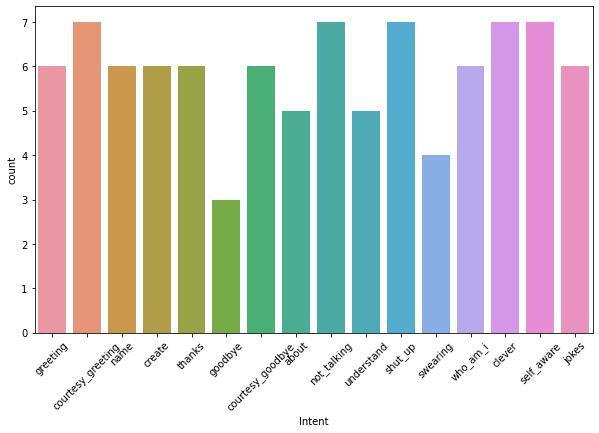

In [23]:
plt.figure(figsize=(10,6))
fig = sns.countplot(data=df,x='Intent')
fig.set_xticklabels(fig.get_xticklabels(), rotation=45)
plt.show()

Data Pre-processing

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.stem import WordNetLemmatizer
import re 
import nltk

import warnings
warnings.filterwarnings('ignore')

In [6]:
sentences = []
sent_labels = []
labels = []

for item_int in int_data['intents']:
    for pattern in item_int['patterns']:
        lemmatizer = WordNetLemmatizer()
        text = re.sub('[^a-zA-Z]', ' ', pattern) # punctuation removal
        text = text.lower() # convert to lowercase
        words = text.split()
        words = [lemmatizer.lemmatize(w) for w in words] # lemmatizing
        sentences.append(" ".join(words))
        sent_labels.append(item_int['tag'])
        if item_int['tag'] not in labels:
            labels.append(item_int['tag'])

In [7]:
print(len(sentences))
print(len(sent_labels))
print(len(labels))

94
94
16


In [6]:
max(len(x.split()) for x in sentences)

8

<AxesSubplot:ylabel='Count'>

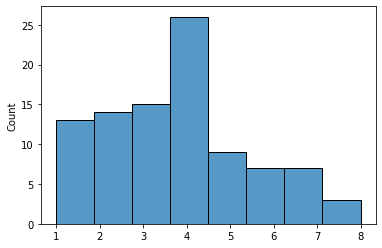

In [7]:
sns.histplot(x=(len(x.split()) for x in sentences))

In [8]:
lb = LabelEncoder()
y_label = lb.fit_transform(sent_labels)

In [9]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [10]:
print(len(tokenizer.word_index))

97


In [11]:
with open('assets/tokenizer_chat.pickle', 'wb') as f: 
    pickle.dump(tokenizer, f)
with open('assets/label_encoder_chat.pickle','wb') as file:
    pickle.dump(lb,file)

In [12]:
x = tokenizer.texts_to_sequences(sentences)
x_pad = pad_sequences(x,maxlen=8)

In [13]:
x_pad

array([[ 0,  0,  0,  0,  0,  0,  0, 31],
       [ 0,  0,  0,  0,  0,  0, 31, 32],
       [ 0,  0,  0,  0,  0,  0,  0, 18],
       [ 0,  0,  0,  0,  0,  0, 18, 32],
       [ 0,  0,  0,  0,  0,  0,  0, 44],
       [ 0,  0,  0,  0,  0,  0, 44, 32],
       [ 0,  0,  0,  0,  0, 12,  2,  1],
       [ 0,  0,  0,  0, 31, 12,  2,  1],
       [ 0,  0,  0,  0, 18, 12,  2,  1],
       [ 0,  0,  0,  0, 12,  2,  1, 33],
       [ 0,  0,  0, 45,  1,  2, 33, 46],
       [ 0,  0, 18, 45,  1,  2, 33, 46],
       [ 0,  0,  0,  0, 12, 47, 61, 62],
       [ 0,  0,  0,  0,  4, 19, 10, 48],
       [ 0,  0,  0,  4, 63,  6, 34,  1],
       [ 0,  0,  0,  4,  5,  6, 34,  1],
       [ 0,  0,  4,  3, 10, 64, 34,  1],
       [ 0,  0,  0,  0,  0,  9,  2,  1],
       [ 0,  0,  0,  0, 49,  7, 10, 48],
       [ 0,  0,  0,  0,  0,  9, 65,  1],
       [ 0,  0,  0,  0,  9, 19, 10, 66],
       [ 0,  0,  3,  1, 20,  9, 50,  1],
       [ 0,  0,  0,  0,  9, 19, 10, 67],
       [ 0,  0,  0,  0,  0,  9, 50,  1],
       [ 0,  0, 

In [14]:
x_train, x_test, y_train_lb, y_test_lb = train_test_split(x_pad, y_label, test_size=0.2, random_state=42)

In [15]:
x_train

array([[ 0,  0,  0,  0,  0,  0,  0, 55],
       [ 0,  0,  0,  4,  5,  6, 34,  1],
       [ 0,  0,  0,  0,  5,  1, 14,  7],
       [ 0,  0,  0,  0,  1,  2,  8, 60],
       [ 0,  0,  0,  0,  0, 69, 47, 70],
       [ 0,  0,  0,  0,  0,  0,  0, 23],
       [ 0,  0, 18, 45,  1,  2, 33, 46],
       [ 0,  0,  0,  0,  0,  0,  0, 88],
       [ 0,  0,  0,  0,  3,  1, 14,  7],
       [ 0,  0,  0,  0,  0,  0,  0, 22],
       [ 0,  0,  1,  2,  8, 27, 59, 41],
       [ 0,  0,  0,  0, 12,  2,  1, 33],
       [ 0,  5,  1, 14, 56, 57, 37, 58],
       [ 0,  0,  0,  0,  0,  0, 44, 32],
       [ 0,  0,  0,  0,  0,  4,  1,  3],
       [ 0,  0,  0,  0, 38, 15, 16,  1],
       [ 0,  0,  4,  3, 10, 64, 34,  1],
       [ 0,  0,  6, 24, 38, 15, 16,  1],
       [ 0,  0,  0,  0,  0,  0, 13, 22],
       [ 0,  0,  0,  0, 31, 12,  2,  1],
       [ 0,  0,  0,  0,  0,  0,  0, 60],
       [ 0,  0,  0,  0,  0,  0,  0, 35],
       [ 0,  0,  0,  0,  0,  9, 65,  1],
       [ 0,  0,  0,  0,  1,  2, 27, 59],
       [ 0,  0, 

In [16]:
y_train = to_categorical(y_train_lb)

In [17]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [18]:
print(x_train.shape, y_train.shape)

(75, 8) (75, 16)


In [19]:
y_test = to_categorical(y_test_lb)

In [20]:
print(x_test.shape, y_test.shape)

(19, 8) (19, 16)


Training

In [21]:
from keras.models import Sequential
from keras.layers import LSTM,Dense,Embedding,Dropout

In [22]:
model = Sequential()
model.add(Embedding(input_dim=98,output_dim=64,input_length=8))
model.add(LSTM(64))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16,activation='softmax'))

2022-07-28 18:05:45.414868: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 8, 64)             6272      
_________________________________________________________________
lstm (LSTM)                  (None, 64)                33024     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
Total params: 41,904
Trainable params: 41,904
Non-trainable params: 0
_________________________________________________________________


In [24]:
hist=model.fit(x_train,y_train,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150


2022-07-28 18:05:45.794022: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


3/3 [==============================] - 3s 247ms/step - loss: 2.7740 - accuracy: 0.0800 - val_loss: 2.7704 - val_accuracy: 0.0526
Epoch 2/150
3/3 [==============================] - 0s 18ms/step - loss: 2.7671 - accuracy: 0.1200 - val_loss: 2.7686 - val_accuracy: 0.1579
Epoch 3/150
3/3 [==============================] - 0s 17ms/step - loss: 2.7617 - accuracy: 0.1867 - val_loss: 2.7651 - val_accuracy: 0.1579
Epoch 4/150
3/3 [==============================] - 0s 17ms/step - loss: 2.7550 - accuracy: 0.1600 - val_loss: 2.7620 - val_accuracy: 0.2105
Epoch 5/150
3/3 [==============================] - 0s 16ms/step - loss: 2.7511 - accuracy: 0.1867 - val_loss: 2.7594 - val_accuracy: 0.2105
Epoch 6/150
3/3 [==============================] - 0s 16ms/step - loss: 2.7455 - accuracy: 0.1467 - val_loss: 2.7571 - val_accuracy: 0.1579
Epoch 7/150
3/3 [==============================] - 0s 17ms/step - loss: 2.7400 - accuracy: 0.1733 - val_loss: 2.7525 - val_accuracy: 0.1579
Epoch 8/150
3/3 [==============

3/3 [==============================] - 0s 17ms/step - loss: 0.3208 - accuracy: 0.8933 - val_loss: 1.4213 - val_accuracy: 0.5263
Epoch 118/150
3/3 [==============================] - 0s 14ms/step - loss: 0.3036 - accuracy: 0.9333 - val_loss: 1.2757 - val_accuracy: 0.6316
Epoch 119/150
3/3 [==============================] - 0s 16ms/step - loss: 0.2778 - accuracy: 0.9200 - val_loss: 1.2551 - val_accuracy: 0.6316
Epoch 120/150
3/3 [==============================] - 0s 14ms/step - loss: 0.2696 - accuracy: 0.9200 - val_loss: 1.3447 - val_accuracy: 0.5789
Epoch 121/150
3/3 [==============================] - 0s 15ms/step - loss: 0.2863 - accuracy: 0.9467 - val_loss: 1.4277 - val_accuracy: 0.5263
Epoch 122/150
3/3 [==============================] - 0s 16ms/step - loss: 0.3766 - accuracy: 0.8800 - val_loss: 1.5072 - val_accuracy: 0.5263
Epoch 123/150
3/3 [==============================] - 0s 14ms/step - loss: 0.3389 - accuracy: 0.8667 - val_loss: 1.5379 - val_accuracy: 0.5263
Epoch 124/150
3/3 [=

In [25]:
model.save('models/model_chat.h5', hist)

In [26]:
from sklearn.metrics import classification_report

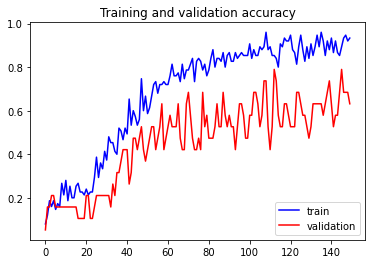

In [27]:
plt.plot(hist.history['accuracy'],c='b',label='train')
plt.plot(hist.history['val_accuracy'],c='r',label='validation')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

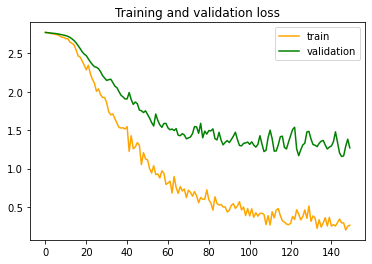

In [28]:
plt.plot(hist.history['loss'],c='orange',label='train')
plt.plot(hist.history['val_loss'],c='g',label='validation')
plt.title('Training and validation loss')
plt.legend(loc='upper right')
plt.show()

In [29]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 18ms/step - loss: 1.2700 - accuracy: 0.6316


[1.2700494527816772, 0.6315789222717285]

In [30]:
y_test_true = y_test_lb
y_test_pred = np.argmax(model.predict(x_test), axis=1)

In [31]:
y_test_true

array([ 0,  4, 14, 15,  6, 13,  2, 12,  3,  0, 10,  2,  7, 11,  3,  6,  8,
       13,  9])

In [32]:
y_test_pred

array([ 0,  4, 15,  6,  6, 13,  2, 11,  3,  8, 10,  2,  1, 11,  3,  6, 10,
        5,  9])

In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test_true, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         1
           5       0.00      0.00      0.00         0
           6       0.67      1.00      0.80         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         1
           9       1.00      1.00      1.00         1
          10       0.50      1.00      0.67         1
          11       0.50      1.00      0.67         1
          12       0.00      0.00      0.00         1
          13       1.00      0.50      0.67         2
          14       0.00      0.00      0.00         1
          15       0.00      0.00      0.00         1

    accuracy                           0.63        19
   macro avg       0.48   